<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [22]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2023-03-05 14:14:00--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.20’

m4_survey_data.sqli 100%[===================>]  34.98M  34.4MB/s    in 1.0s    

2023-03-05 14:14:02 (34.4 MB/s) - ‘m4_survey_data.sqlite.20’ saved [36679680/36679680]



Connect to the database.


In [23]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Demo: How to run an sql query


In [25]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [26]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [27]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [29]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


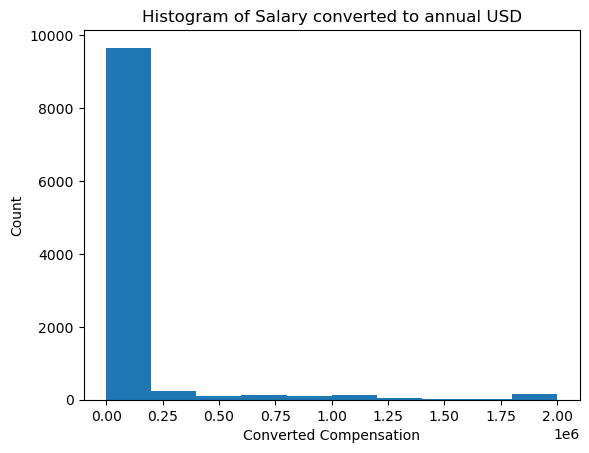

In [40]:
# create a dataframe of the master table 

QUERY = """
SELECT* 
FROM master
"""

df_master = pd.read_sql_query(QUERY,conn)

# create the plot
fig = plt.figure( )
df_master['ConvertedComp'].plot(kind='hist')

plt.title('Histogram of Salary converted to annual USD')
plt.ylabel('Count')
plt.xlabel('Converted Compensation')
#plt.savefig('Histogram_Salary_converted_to_annual_USD')
plt.show()

### Box Plots


Plot a box plot of `Age.`


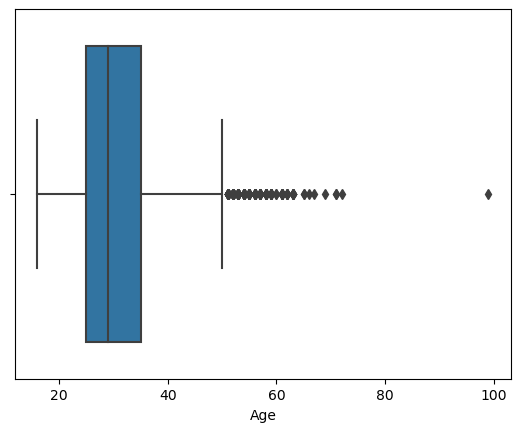

In [37]:
sns.boxplot(x=df_master['Age'])
#plt.savefig('Age_box_plot')

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


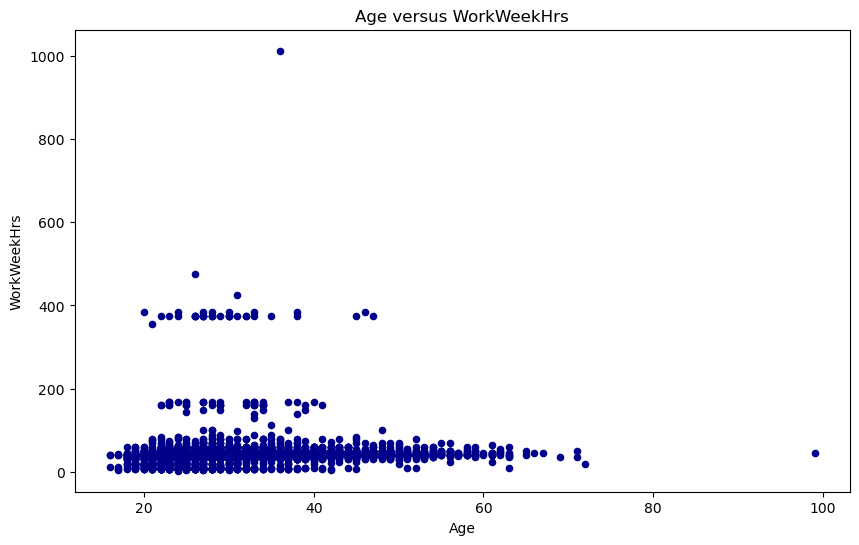

In [39]:
df_master.plot(kind='scatter', x='Age', y='WorkWeekHrs', figsize=(10, 6), color='darkblue')

plt.title('Age versus WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
#plt.savefig('Scatterplot_Age_versus_WorkWeekHrs')
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


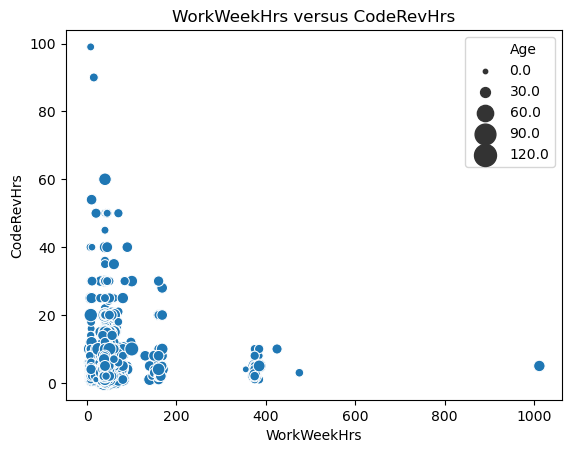

In [43]:
sns.scatterplot(data=df_master, x="WorkWeekHrs", y="CodeRevHrs", size="Age", sizes=(10, 250)).set(title='WorkWeekHrs versus CodeRevHrs')
#plt.savefig('Scatterplot_WorkWeekHrs versus CodeRevHrs')

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


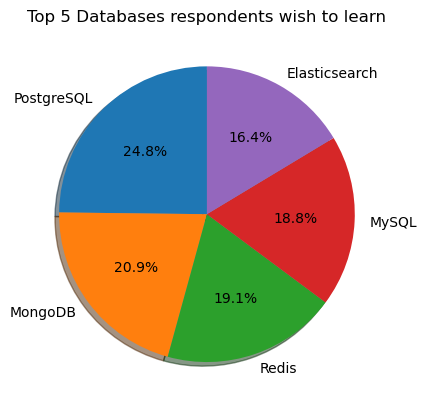

In [49]:
QUERY="""
SELECT DatabaseDesireNextYear, COUNT(*) as 'Number of Respondents'  FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
"""

desired_database_df = pd.read_sql_query(QUERY,conn)
top_five_databases_desired = desired_database_df.sort_values(by=['Number of Respondents'], ascending=False)[:5].reset_index(drop=True)


plt.pie(top_five_databases_desired['Number of Respondents'], 
        labels=top_five_databases_desired['DatabaseDesireNextYear'], 
        autopct='%.1f%%',
        shadow=True, startangle=90)
plt.title('Top 5 Databases respondents wish to learn')
#plt.savefig('Pie_chart_Top_5_databases_respondents_wish_to_learn')
plt.show()

In [13]:
#Question: In the list of the most popular languages which the respondents wish to learn next year, what is the rank of Python?
QUERY="""
SELECT LanguageDesireNextYear, Count(*) as 'Number of Respondents' FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
"""

desired_lang_df = pd.read_sql_query(QUERY,conn)
desired_lang_df= desired_lang_df.sort_values(by=['Number of Respondents'], ascending=False)[:5].reset_index(drop=True)

In [14]:
python_respondents =desired_lang_df.iloc[2:3,0:]
python_respondents

,LanguageDesireNextYear,Number of Respondents
2,Python,5239


In [15]:
# Question: how many respondents currently WORK ONLY with SQL
QUERY="""
SELECT LanguageWorkedWith, Count(*) as 'Number of Respondents' FROM LanguageWorkedWith
GROUP BY LanguageWorkedWith
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
lang_df = pd.read_sql_query(QUERY,conn)

sql_respondents = lang_df.loc[lang_df['LanguageWorkedWith'] == 'SQL']
sql_respondents

,LanguageWorkedWith,Number of Respondents
22,SQL,7106


In [16]:
#Question: How many Resppondents claim they only work with MySQL
QUERY="""
SELECT * FROM DatabaseWorkedWith
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
db_df = pd.read_sql_query(QUERY,conn)

# drop all respondents that work with more than one database
no_dup_db_df = db_df.drop_duplicates(subset='Respondent', keep = False)
#no_dup_db_df 

#find how many respondents ONLY use MySQL
MySQL_Respondents = no_dup_db_df.loc[no_dup_db_df['DatabaseWorkedWith']== 'MySQL'] # create a dataframe that contains all the respondents that only work work with MySQL 
MySQL_Respondents.count() # count the respondents that only work with MySQL

# another approach
#mysql_db_df = no_dup_db_df.loc[no_dup_db_df['DatabaseWorkedWith']  == 'MySQL']
#print(f'Number of respondents that only use MySQL is: {mysql_db_df.shape[0]}')

Respondent            474
DatabaseWorkedWith    474
dtype: int64

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


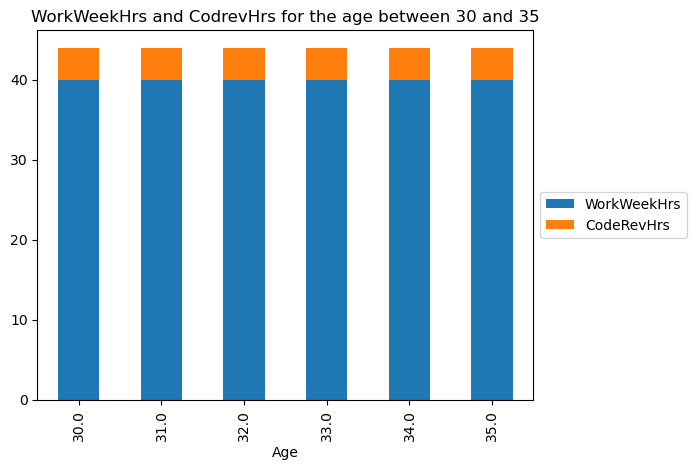

In [52]:
QUERY="""
SELECT WorkWeekHrs, CodeRevHrs, Age 
FROM master
WHERE Age BETWEEN 30 AND 35
"""
hours_df = pd.read_sql_query(QUERY, conn)
hours_df.dropna(axis=0, inplace=True)

median_hours_df = hours_df.groupby(hours_df['Age'], as_index=False)[['WorkWeekHrs', 'CodeRevHrs']].median()
median_hours_df

median_hours_df.plot(x='Age', kind='bar', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('WorkWeekHrs and CodrevHrs for the age between 30 and 35')
#plt.savefig('Stacked_bar_chart_WorkWeekHrs_and_CodrevHrs_between_30_and_35')
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


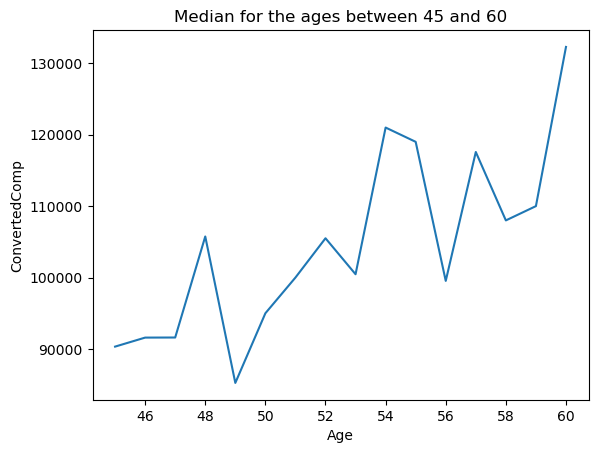

In [54]:
QUERY="""
SELECT Respondent, ConvertedComp, Age
FROM master
WHERE Age BETWEEN 45 AND 60
"""
comp_df = pd.read_sql_query(QUERY, conn)
comp_df.dropna(axis=0, inplace=True)

median_comp_df = comp_df.groupby(comp_df['Age'], as_index=False)['ConvertedComp'].median()
median_comp_df

sns.lineplot(data = median_comp_df, x = 'Age', y= 'ConvertedComp').set(title='Median for the ages between 45 and 60')
#plt.savefig('Line_Chart_Median_for_ages_between_45_and_60')

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


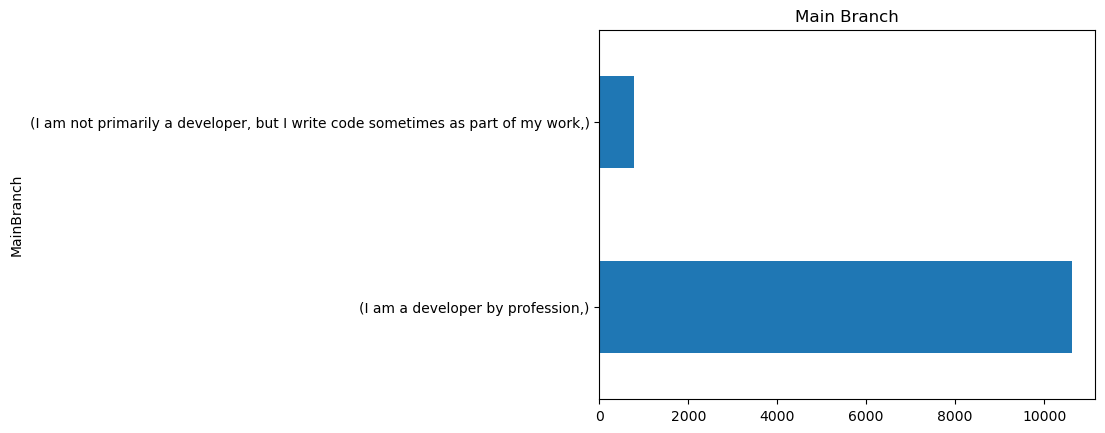

In [60]:
QUERY="""
SELECT MainBranch
FROM master
"""
mainbranch_df = pd.read_sql_query(QUERY, conn)

mainbranch_df.value_counts().plot.barh().set(title='Main Branch')
#plt.savefig('Bar_Chart_Main_Branch')
plt.show()

Close the database connection.


In [61]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
